In [1]:
import zipfile
import os
from PIL import Image
import numpy as np

# Step 1: Extract the ZIP file
zip_file_path = 'German.zip'  # Replace with your ZIP file path
extract_dir = 'GermanExtractedFiles'  # Directory to extract files

# Extract the ZIP file
if not os.path.exists(extract_dir):  # Avoid re-extraction if already done
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"ZIP file extracted to '{extract_dir}'!")
else:
    print(f"Directory '{extract_dir}' already exists. Skipping extraction.")

Directory 'GermanExtractedFiles' already exists. Skipping extraction.


In [6]:
# Correct the dataset path
dataset_path = os.path.join(extract_dir, 'TestIJCNN2013')

# Step 2: Load and preprocess images
image_size = (128, 128)  # Resize all images to 128x128
images = []
labels = []

# Debug: Check if the dataset folder exists
if not os.path.exists(dataset_path):
    print(f"Error: Dataset folder '{dataset_path}' not found!")

# Loop through extracted files
for root, dirs, files in os.walk(dataset_path):
    print(f"Scanning directory: {root}, Found {len(files)} files")  # Debugging line
    for file_name in files:
        if file_name.lower().endswith(('.jpg', '.png','.ppm', '.jpeg')):  # Support more formats
            file_path = os.path.join(root, file_name)

            try:
                # Load the image
                image = Image.open(file_path).convert('RGB')  

                # Resize the image
                image = image.resize(image_size)

                # Convert the image to a NumPy array
                image_array = np.array(image) / 255.0  
                images.append(image_array)
   # Extract label from folder name
                label = os.path.basename(root)  
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Step 3: Print dataset summary
if len(images) > 0:
    print(f"Total images loaded: {len(images)}")
    print(f"Image shape: {images[0].shape} (Each image is resized to {image_size})")
    print(f"Unique labels: {set(labels)}")
else:
    print("No images were loaded. Check the dataset path and file formats.")

Scanning directory: GermanExtractedFiles\TestIJCNN2013, Found 0 files
Scanning directory: GermanExtractedFiles\TestIJCNN2013\TestIJCNN2013Download, Found 301 files
Total images loaded: 300
Image shape: (128, 128, 3) (Each image is resized to (128, 128))
Unique labels: {'TestIJCNN2013Download'}


In [8]:
# Correct the dataset path
dataset_path = os.path.join(extract_dir, 'TrainIJCNN2013')

# Step 2: Load and preprocess images
image_size = (128, 128)  # Resize all images to 128x128
images = []
labels = []

# Debug: Check if the dataset folder exists
if not os.path.exists(dataset_path):
    print(f"Error: Dataset folder '{dataset_path}' not found!")
# Loop through extracted files
for root, dirs, files in os.walk(dataset_path):
    print(f"Scanning directory: {root}, Found {len(files)} files")  # Debugging line
    for file_name in files:
        if file_name.lower().endswith(('.jpg', '.png','.ppm', '.jpeg')):  # Support more formats
            file_path = os.path.join(root, file_name)

            try:
                # Load the image
                image = Image.open(file_path).convert('RGB')  

                # Resize the image
                image = image.resize(image_size)

                # Convert the image to a NumPy array
                image_array = np.array(image) / 255.0  
                images.append(image_array)

                # Extract label from folder name
                label = os.path.basename(root)  
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")
# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Step 3: Print dataset summary
if len(images) > 0:
    print(f"Total images loaded: {len(images)}")
    print(f"Image shape: {images[0].shape} (Each image is resized to {image_size})")
    print(f"Unique labels: {set(labels)}")
else:
    print("No images were loaded. Check the dataset path and file formats.")

Scanning directory: GermanExtractedFiles\TrainIJCNN2013, Found 0 files
Scanning directory: GermanExtractedFiles\TrainIJCNN2013\TrainIJCNN2013, Found 603 files
Scanning directory: GermanExtractedFiles\TrainIJCNN2013\TrainIJCNN2013\00, Found 4 files
Scanning directory: GermanExtractedFiles\TrainIJCNN2013\TrainIJCNN2013\01, Found 48 files
Scanning directory: GermanExtractedFiles\TrainIJCNN2013\TrainIJCNN2013\02, Found 59 files
Scanning directory: GermanExtractedFiles\TrainIJCNN2013\TrainIJCNN2013\03, Found 21 files
Scanning directory: GermanExtractedFiles\TrainIJCNN2013\TrainIJCNN2013\04, Found 31 files
Scanning directory: GermanExtractedFiles\TrainIJCNN2013\TrainIJCNN2013\05, Found 37 files
Scanning directory: GermanExtractedFiles\TrainIJCNN2013\TrainIJCNN2013\06, Found 17 files
Scanning directory: GermanExtractedFiles\TrainIJCNN2013\TrainIJCNN2013\07, Found 37 files
Scanning directory: GermanExtractedFiles\TrainIJCNN2013\TrainIJCNN2013\08, Found 47 files
Scanning directory: GermanExtrac

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image
import os

# Dataset folder path (Ensure this points to the correct location)
input_folder = "GermanExtractedFiles/TestIJCNN2013"
output_folder = "GermanExtractedFiles/Processed_Output"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)
# Convert images to PNG format
def convert_images_to_png(input_folder, output_folder):
    for class_folder in os.listdir(input_folder):
        class_path = os.path.join(input_folder, class_folder)
        output_class_path = os.path.join(output_folder, class_folder)

        # Ensure output class folder exists
        os.makedirs(output_class_path, exist_ok=True)

        for filename in os.listdir(class_path):
            if filename.lower().endswith((".ppm", ".jpg", ".jpeg", ".png")):
                img_path = os.path.join(class_path, filename)
                try:
                    img = Image.open(img_path)
                    png_filename = os.path.splitext(filename)[0] + ".png"
                    img.save(os.path.join(output_class_path, png_filename), "PNG")
                except Exception as e:
                    print(f"Error converting {img_path}: {e}")

convert_images_to_png(input_folder, output_folder)
print("Conversion to PNG completed successfully!")
# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    output_folder,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Load validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    output_folder,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)
# Display class names detected
print(f"Class names: {train_dataset.class_names}")

# Model with PPM for Traffic Sign Classification
def build_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Base feature extractor (using a simple CNN)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Classification Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Build and compile the model
num_classes = len(train_dataset.class_names)
model = build_model((128, 128, 3), num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()
# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=15)

Conversion to PNG completed successfully!
Found 900 files belonging to 2 classes.
Using 720 files for training.
Found 900 files belonging to 2 classes.
Using 180 files for validation.
Class names: ['TestIJCNN2013Download', 'TrainIJCNN2013']


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,186 (426.51 KB)

 Trainable params: 109,186 (426.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5147 - loss: 13.8568 - val_accuracy: 0.6667 - val_loss: 1.2205
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6014 - loss: 0.9171 - val_accuracy: 0.3722 - val_loss: 0.7405
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5299 - loss: 0.7209 - val_accuracy: 0.6667 - val_loss: 0.7323
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.5624 - loss: 0.7738 - val_accuracy: 0.6667 - val_loss: 0.9399
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6073 - loss: 0.7845 - val_accuracy: 0.6722 - val_loss: 0.6253
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6363 - loss: 0.6564 - val_accuracy: 0.6833 - val_loss: 0.6311
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6561 - loss: 0.6519 - val_accuracy: 0.6667 - val_loss: 0.6788
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6126 - loss: 0.6885 - val_accuracy: 0.6667 - val_loss

In [12]:
import tensorflow as tf

# Correct dataset folder path
dataset_folder = "GermanExtractedFiles/TestIJCNN2013"  # Ensure this points to the folder with class subdirectories

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    output_folder,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Load validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    output_folder,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Display class names detected
print(f"Class names: {train_dataset.class_names}")

Found 900 files belonging to 2 classes.
Using 720 files for training.
Found 900 files belonging to 2 classes.
Using 180 files for validation.
Class names: ['TestIJCNN2013Download', 'TrainIJCNN2013']


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image
import os

# Dataset folder path (Ensure this points to the correct location)
input_folder = "GermanExtractedFiles/TrainIJCNN2013"
output_folder = "GermanExtractedFiles/Processed_Output"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Convert images to PNG format
def convert_images_to_png(input_folder, output_folder):
    for class_folder in os.listdir(input_folder):
        class_path = os.path.join(input_folder, class_folder)
        output_class_path = os.path.join(output_folder, class_folder)

        # Ensure output class folder exists
        os.makedirs(output_class_path, exist_ok=True)

        for filename in os.listdir(class_path):
            if filename.lower().endswith((".ppm", ".jpg", ".jpeg", ".png")):
                img_path = os.path.join(class_path, filename)
                try:
                    img = Image.open(img_path)
                    png_filename = os.path.splitext(filename)[0] + ".png"
                    img.save(os.path.join(output_class_path, png_filename), "PNG")
                except Exception as e:
                    print(f"Error converting {img_path}: {e}")

convert_images_to_png(input_folder, output_folder)
print("Conversion to PNG completed successfully!")

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    output_folder,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Load validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    output_folder,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)
# Display model summary
model.summary()

# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=15)# Display class names detected
print(f"Class names: {train_dataset.class_names}")

# Model with PPM for Traffic Sign Classification
def build_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Base feature extractor (using a simple CNN)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Classification Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Build and compile the model
num_classes = len(train_dataset.class_names)
model = build_model((128, 128, 3), num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Display model summary
model.summary()

# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=15)

Conversion to PNG completed successfully!
Found 900 files belonging to 2 classes.
Using 720 files for training.
Found 900 files belonging to 2 classes.
Using 180 files for validation.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 327,560 (1.25 MB)

 Trainable params: 109,186 (426.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,374 (853.03 KB)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.6282 - loss: 0.6650 - val_accuracy: 0.6667 - val_loss: 0.6360
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6267 - loss: 0.6706 - val_accuracy: 0.6722 - val_loss: 0.6208
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6506 - loss: 0.6503 - val_accuracy: 0.6833 - val_loss: 0.6292
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6484 - loss: 0.6475 - val_accuracy: 0.6667 - val_loss: 0.6494
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 777ms/step - accuracy: 0.6436 - loss: 0.6491 - val_accuracy: 0.6833 - val_loss: 0.6131
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 625ms/step - accuracy: 0.6581 - loss: 0.6297 - val_accuracy: 0.6833 - val_loss: 0.6120
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 638ms/step - accuracy: 0.6540 - loss: 0.6367 - val_accuracy: 0.6667 - val_loss: 0.6436
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 643ms/step - accuracy: 0.6276 - loss: 0.6653 - val_accuracy: 0.6833

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,186 (426.51 KB)

 Trainable params: 109,186 (426.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 684ms/step - accuracy: 0.5604 - loss: 9.7374 - val_accuracy: 0.3333 - val_loss: 2.7445
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 651ms/step - accuracy: 0.4830 - loss: 1.7588 - val_accuracy: 0.6667 - val_loss: 0.6392
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 660ms/step - accuracy: 0.5226 - loss: 0.8097 - val_accuracy: 0.6667 - val_loss: 0.6470
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 667ms/step - accuracy: 0.6242 - loss: 0.6762 - val_accuracy: 0.6667 - val_loss: 0.6253
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 718ms/step - accuracy: 0.6170 - loss: 0.6811 - val_accuracy: 0.6667 - val_loss: 0.6533
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 672ms/step - accuracy: 0.6330 - loss: 0.6926 - val_accuracy: 0.6667 - val_loss: 0.6219
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 677ms/step - accuracy: 0.5975 - loss: 0.6868 - val_accuracy: 0.4000 - val_loss: 0.7295
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 675ms/step - accuracy: 0.5042 - loss: 0.7511 - val_accu

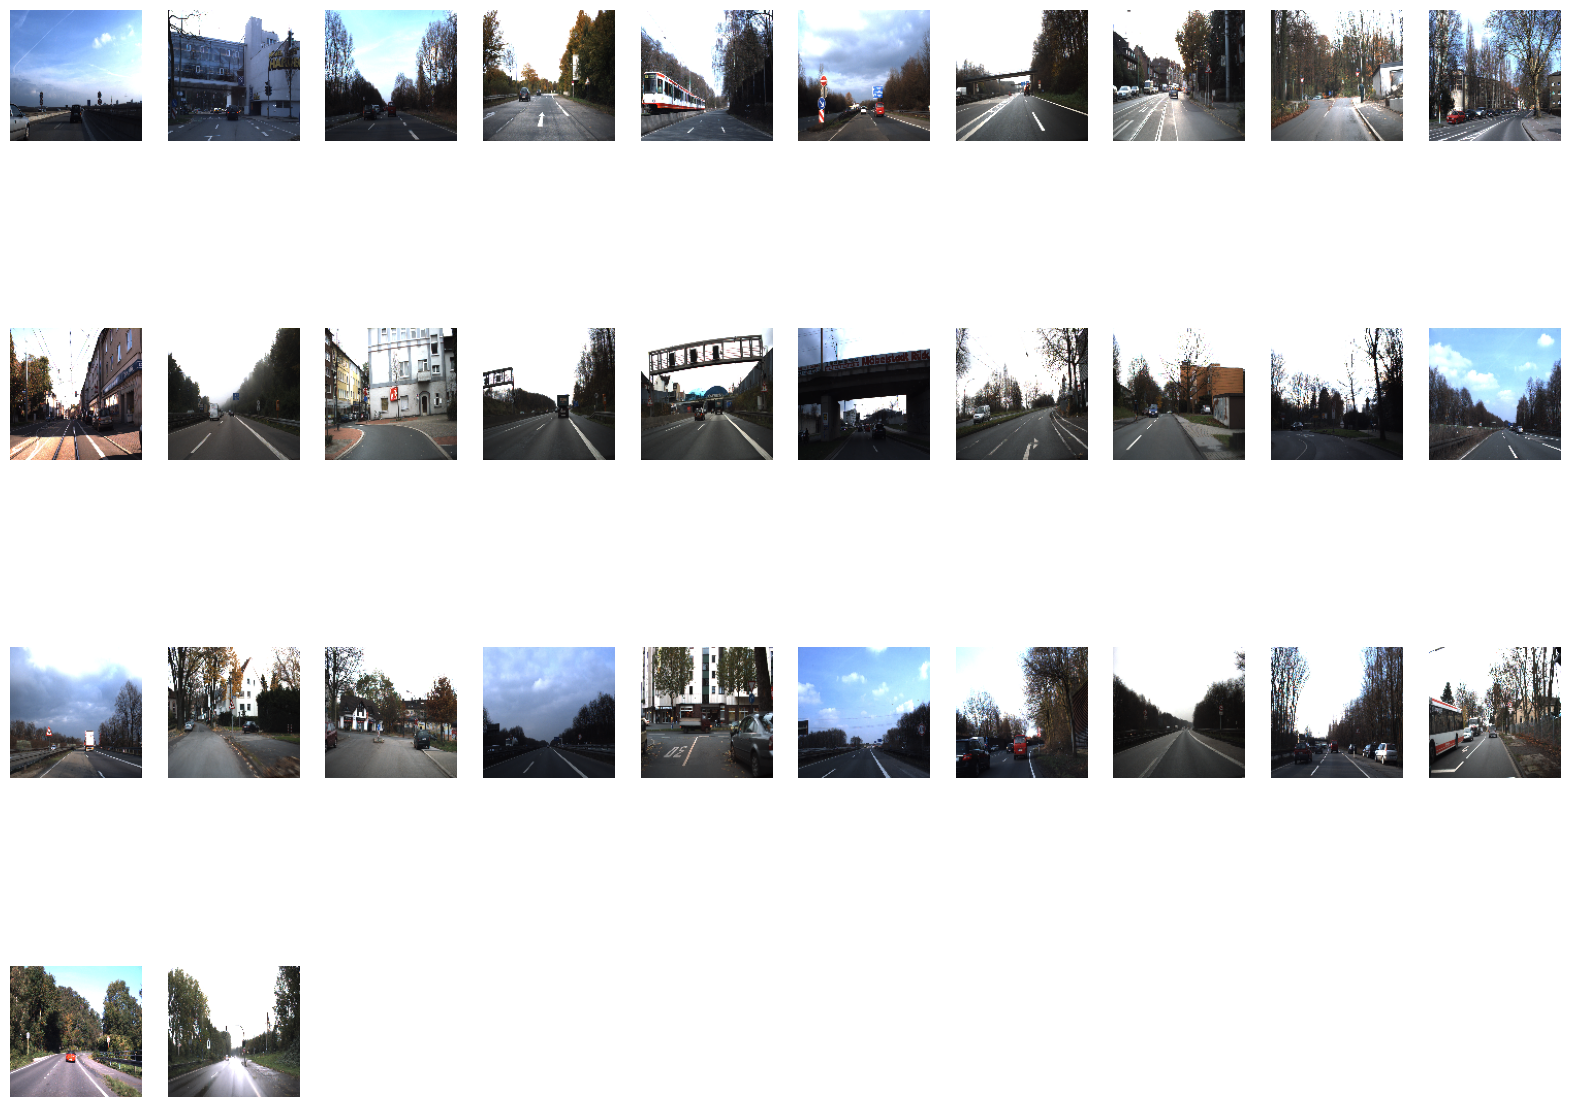

In [18]:
import matplotlib.pyplot as plt

# Display resized images
for images, labels in train_dataset.take(1):  # Take one batch from the dataset
    plt.figure(figsize=(20, 20))
    
    num_images = min(50, images.shape[0])  # Ensure we don't exceed batch size
    for i in range(num_images):  # Loop over available images
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
    
    plt.show()

In [20]:
import tensorflow as tf

# Load dataset from a directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    output_folder,  # Replace with your dataset directory
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32          # Specify batch size
)

# Normalize pixel values in the dataset
normalized_dataset = dataset.map(lambda x, y: (x / 255.0, y))

# Verify normalization
for images, labels in normalized_dataset.take(1):
    print(f"Image pixel range: {tf.reduce_min(images)} to {tf.reduce_max(images)}")

Found 900 files belonging to 2 classes.
Image pixel range: 0.005361519753932953 to 1.0


In [22]:
def handle_color_channels(image, label):
    # Split the color channels
    red_channel = image[:, :, :, 0]  # Red channel
    green_channel = image[:, :, :, 1]  # Green channel
    blue_channel = image[:, :, :, 2]  # Blue channel

    # Example: Set the Red channel to zero
    red_channel = tf.zeros_like(red_channel)

    # Stack the modified channels back together
    image = tf.stack([red_channel, green_channel, blue_channel], axis=-1)

    # Return the processed image and label
    return image, label

In [24]:
# Apply the handle_color_channels function to the dataset
processed_dataset = dataset.map(handle_color_channels)

# Prefetch the dataset to optimize performance
processed_dataset = processed_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


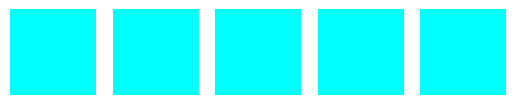

In [26]:
# Visualize a few images from the processed dataset
for images, labels in processed_dataset.take(1):  # Take one batch
    for i in range(5):  # Show the first 5 images
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("float32"))
        plt.axis('off')
    plt.show()

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_dataset.class_names), activation='softmax')  # Output layer
])
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Model summary
model.summary()

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
import os
import tensorflow as tf
from PIL import Image

# Correct dataset folder
dataset_folder = output_folder

# Function to check and remove corrupt images
def clean_dataset(folder):
    removed_files = 0
    for root, dirs, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify if the image is not corrupted
            except (IOError, SyntaxError):
                print(f"Removing corrupt file: {file_path}")
                os.remove(file_path)
                removed_files += 1
    print(f"Total corrupt images removed: {removed_files}")  

# Clean dataset before loading
clean_dataset(dataset_folder)
# Reload the dataset with corrected path
def load_dataset(folder, image_size=(128, 128), batch_size=32, subset="training"):
    return tf.keras.preprocessing.image_dataset_from_directory(
        folder,  # Root directory where class folders are located
        image_size=image_size,
        batch_size=batch_size,
        validation_split=0.2,
        subset=subset,
        seed=123
    )

train_dataset = load_dataset(dataset_folder, subset="training")
validation_dataset = load_dataset(dataset_folder, subset="validation")

# Ensure the dataset has multiple classes
num_classes = len(train_dataset.class_names)
if num_classes < 2:
    raise ValueError("Dataset has only one class. Ensure subdirectories for each class.")
print(f"Classes detected: {train_dataset.class_names}")

# Prefetch for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


Total corrupt images removed: 0
Found 900 files belonging to 2 classes.
Using 720 files for training.
Found 900 files belonging to 2 classes.
Using 180 files for validation.
Classes detected: ['TestIJCNN2013Download', 'TrainIJCNN2013']


In [32]:
# Set training parameters
epochs = 20  # You can adjust this based on performance
batch_size = 32  # Same as used in dataset loading

history = model.fit(
    train_dataset,  
    validation_data=validation_dataset,  
    epochs=epochs  
)


# Save the trained model
model.save("cnn_model.h5")
print("Model saved successfully!")

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 722ms/step - accuracy: 0.5228 - loss: 67.2137 - val_accuracy: 0.6667 - val_loss: 0.7214
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5796 - loss: 0.7287 - val_accuracy: 0.6667 - val_loss: 0.6412
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6534 - loss: 0.6713 - val_accuracy: 0.6667 - val_loss: 0.6427
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6475 - loss: 0.6646 - val_accuracy: 0.6667 - val_loss: 0.6496
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6502 - loss: 0.6822 - val_accuracy: 0.6667 - val_loss: 0.6935
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6553 - loss: 0.6780 - val_accuracy: 0.6667 - val_loss: 0.6388
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6559 - loss: 0.6546 - val_accuracy: 0.6667 - val_loss: 0.6375
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6437 - loss: 0.6381 - val_accuracy: 0.6667 - val_l

Model saved successfully!


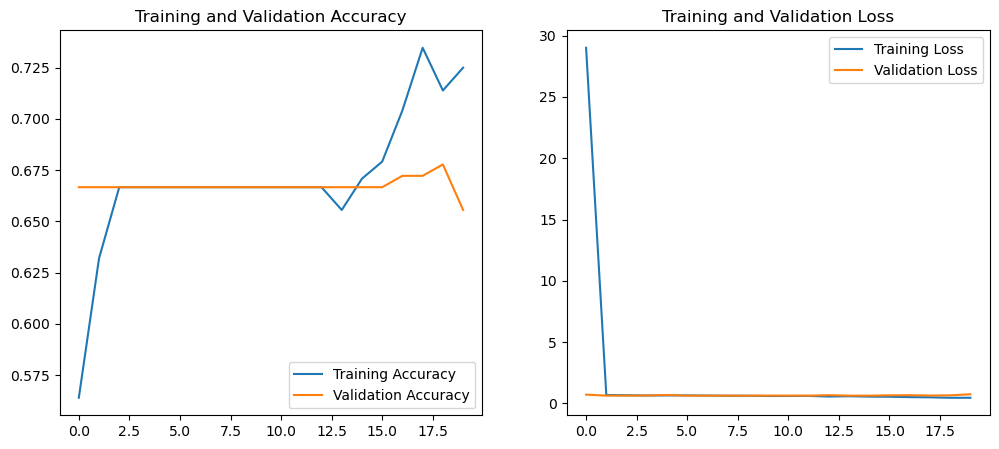

In [34]:
# Extract values from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()

In [36]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in validation_dataset:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [38]:
print(train_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


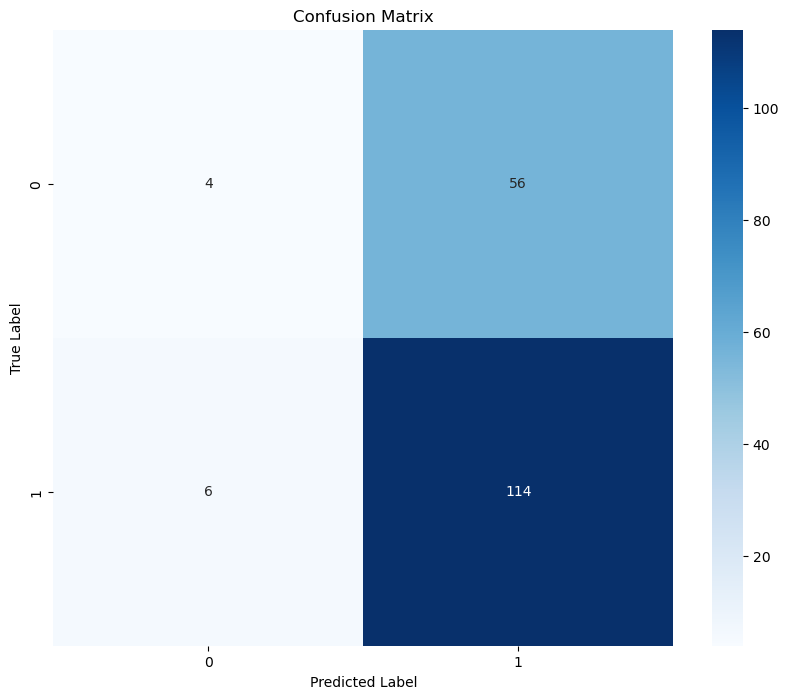

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.07      0.11        60
           1       0.67      0.95      0.79       120

    accuracy                           0.66       180
   macro avg       0.54      0.51      0.45       180
weighted avg       0.58      0.66      0.56       180



In [40]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation transformations
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Apply augmentation to the training dataset
augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [44]:
from sklearn.utils.class_weight import compute_class_weight

# Get label distribution
label_counts = np.bincount(y_true)
total_samples = sum(label_counts)
num_classes = len(label_counts)

# Compute class weights
class_weights = {i: total_samples / (num_classes * count) for i, count in enumerate(label_counts)}
print("Class Weights:", class_weights)

Class Weights: {0: 1.5, 1: 0.75}


In [46]:
# Train the model with augmented dataset and class weights
history = model.fit(
    augmented_train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    class_weight=class_weights  # Apply class weights
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 663ms/step - accuracy: 0.5777 - loss: 0.9158 - val_accuracy: 0.5833 - val_loss: 0.6806
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5956 - loss: 0.7096 - val_accuracy: 0.5389 - val_loss: 0.6939
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5892 - loss: 0.6929 - val_accuracy: 0.7000 - val_loss: 0.6735
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5938 - loss: 0.7026 - val_accuracy: 0.3611 - val_loss: 0.7031
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5152 - loss: 0.7107 - val_accuracy: 0.6056 - val_loss: 0.6816
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6043 - loss: 0.6926 - val_accuracy: 0.4222 - val_loss: 0.6978
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5043 - loss: 0.6982 - val_accuracy: 0.5167 - val_loss: 0.6852
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5660 - loss: 0.6936 - val_accuracy: 0.4611 - val_lo

In [50]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10  # Fewer epochs since the model is already trained on general features
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 723ms/step - accuracy: 0.5885 - loss: 0.6701 - val_accuracy: 0.6833 - val_loss: 0.6308
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 711ms/step - accuracy: 0.6870 - loss: 0.6105 - val_accuracy: 0.6778 - val_loss: 0.6138
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 736ms/step - accuracy: 0.7313 - loss: 0.5467 - val_accuracy: 0.6833 - val_loss: 0.6327
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 729ms/step - accuracy: 0.7373 - loss: 0.4805 - val_accuracy: 0.6778 - val_loss: 0.6391
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 729ms/step - accuracy: 0.7204 - loss: 0.7218 - val_accuracy: 0.6667 - val_loss: 0.6589
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 731ms/step - accuracy: 0.6745 - loss: 0.7415 - val_accuracy: 0.6667 - val_loss: 0.6676
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 893ms/step - accuracy: 0.6461 - loss: 0.6697 - val_accuracy: 0.6667 - val_loss: 0.6621
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 822ms/step - accuracy: 0.6556 - loss: 0.6624 - val_accu

In [52]:
# Unfreeze some layers of the base model
base_model.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train again with fine-tuning
history_finetune = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 817ms/step - accuracy: 0.6828 - loss: 0.6454 - val_accuracy: 0.6667 - val_loss: 0.6509
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 780ms/step - accuracy: 0.6380 - loss: 0.6606 - val_accuracy: 0.6667 - val_loss: 0.6508
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 778ms/step - accuracy: 0.6701 - loss: 0.6497 - val_accuracy: 0.6667 - val_loss: 0.6508
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 737ms/step - accuracy: 0.6542 - loss: 0.6550 - val_accuracy: 0.6667 - val_loss: 0.6508
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 859ms/step - accuracy: 0.6463 - loss: 0.6577 - val_accuracy: 0.6667 - val_loss: 0.6508


In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
# Function to generate Grad-CAM heatmaps
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # Create a model that maps the input image to the activations and predictions
    grad_model = Model(
        inputs=model.input, 
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute gradients of the predicted class
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        predicted_class = tf.argmax(predictions[0])
        loss = predictions[:, predicted_class]

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel by the importance weight
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)
     # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [58]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Function to generate Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        predicted_class = tf.argmax(predictions[0])
        loss = predictions[:, predicted_class]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
# Paths
dataset_path = output_folder  # Replace with your dataset folder path
output_dir = "gradcam_results"  # Directory to save Grad-CAM results
os.makedirs(output_dir, exist_ok=True)

# Model Loading
model_path = "cnn_model.h5"  # Replace with the path to your trained model
model = tf.keras.models.load_model(model_path)
last_conv_layer_name = "conv5_block3_out"  # Replace with the last convolutional layer of your model

# Image Parameters
img_height, img_width = 128, 128  # Resize dimensions

# Process all images in the dataset directory
for img_name in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, img_name)
    try:
        # Load image
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Generate Grad-CAM heatmap
        heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

        # Superimpose heatmap on the image
        img = np.array(img)
        heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
        heatmap_resized = np.uint8(255 * heatmap_resized)
        heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(img, 0.6, heatmap_colored, 0.4, 0)

        # Save Grad-CAM result
        output_path = os.path.join(output_dir, f"gradcam_{img_name}")
        cv2.imwrite(output_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))
        print(f"Saved Grad-CAM for {img_name} to {output_path}")
     
    except Exception as e:
     print(f"Error processing {img_name}: {e}")

Error processing TestIJCNN2013Download: [Errno 13] Permission denied: 'GermanExtractedFiles/Processed_Output\\TestIJCNN2013Download'
Error processing TrainIJCNN2013: [Errno 13] Permission denied: 'GermanExtractedFiles/Processed_Output\\TrainIJCNN2013'
